In [13]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import pandas as pd

driver = webdriver.Chrome()
all_jobs = []

for page_num in range(1, 6):
    url = f"https://internshala.com/jobs/page-{page_num}"
    driver.get(url)
    driver.set_window_size(1920, 1080)
    time.sleep(5)

    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)

    soup = BeautifulSoup(driver.page_source, 'html.parser')
    jobs = soup.find_all('div', class_="internship_meta") 

    for job in jobs:
        # TITLE
        job_title_tag = job.find('a', class_="job-title-href")
        job_title = job_title_tag.get_text(strip=True) if job_title_tag else "No title"

        # COMPANY
        company_tag = job.find('p', class_="company-name")
        company = company_tag.get_text(strip=True) if company_tag else "No Company"

        # SALARY / STIPEND
        salary_tag = job.find('span', class_='desktop')
        salary = salary_tag.get_text(strip=True) if salary_tag else "No Salary"

        # SKILLS
        skills_tag = job.find('div', class_='job_skills')
        skills = skills_tag.get_text(strip=True) if skills_tag else "No Skills"

        # LOCATION
        loc_elem = job.find('p', class_='row-1-item locations')
        if loc_elem:
            span = loc_elem.find('span')
            if span:
                locs = [a.get_text(strip=True) for a in span.find_all('a')]
                location = ", ".join(locs) if locs else "No location links"
            else:
                locs = [a.get_text(strip=True) for a in loc_elem.find_all('a')]
                location = ", ".join(locs) if locs else "No location links"
        else:
            location = "No location"

        all_jobs.append({
            "Title": job_title,
            "Company": company,
            "Location": location,
            "Salary": salary,
            "Skills": skills
        })

driver.quit()

# convert to DataFrame
df = pd.DataFrame(all_jobs)

print(df.head())


                                        Title                   Company  \
0                                    No title                No Company   
1  Digital Video Designer (Direction+ Camera)  Commtel Networks Limited   
2     Motion Graphics Designer / Video Editor  Commtel Networks Limited   
3         Junior Business Development Trainee               Teach Maven   
4     Business Development Trainee (Freshers)               Teach Maven   

                                            Location                 Salary  \
0                                        No location              No Salary   
1                                Navi Mumbai, Mumbai  ₹ 6,00,000 - 9,00,000   
2                                Navi Mumbai, Mumbai  ₹ 6,00,000 - 9,00,000   
3  Chennai, Coimbatore, Mangalore, Mysuru, Hydera...  ₹ 5,30,000 - 8,70,000   
4  Chennai, Mangalore, Visakhapatnam, Hyderabad, ...  ₹ 5,00,000 - 9,00,000   

                                              Skills  
0                  

In [19]:
total_jobs = len(df)
total_jobs

215

In [23]:
top_locations = df['Location'].value_counts().head(5)
top_locations

Location
Bangalore         23
Gurgaon           17
Work from home    16
Mumbai            13
Pune              11
Name: count, dtype: int64

In [36]:
from collections import Counter
all_skills = ",".join(df["Skills"])
skill_counts = Counter([s.strip() for s in all_skills.split(",") if s.strip() and s.strip() != "No Skills"])
top_skills = skill_counts.most_common(10)
top_skills

[('Effective Communication', 4),
 ('Sales', 3),
 ('TeamworkEffective Communication', 3),
 ('NegotiationProblem SolvingEnglish Proficiency (Spoken)SalesEffective Communication',
  2),
 ('MS-OfficeMS-ExcelClient Relationship Management (CRM)Client RelationshipEnglish Proficiency (Spoken)English Proficiency (Written)Hindi Proficiency (Spoken)+1 more',
  2),
 ('MS-Excel', 2),
 ('MS-ExcelEffective Communication', 2),
 ('Adobe Premiere ProVideographyCinematography', 1),
 ('Adobe IllustratorVideo EditingAdobe Premiere ProAnimationAdobe After Effects',
  1),
 ('LeadershipTeam ManagementNegotiationMS-ExcelCoordinationTeamworkEnglish Proficiency (Spoken)+2 more',
  1)]

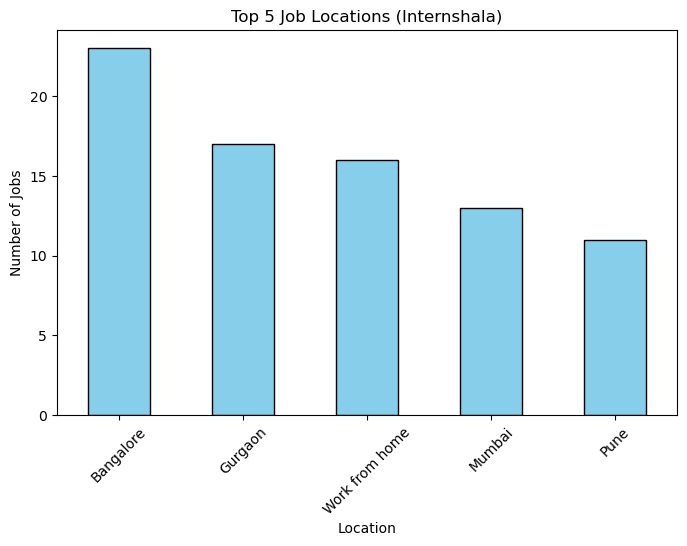

In [32]:
import matplotlib.pyplot as plt

#Top 5 locations
plt.figure(figsize=(8,5))
top_locations.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 5 Job Locations (Internshala)")
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.show()

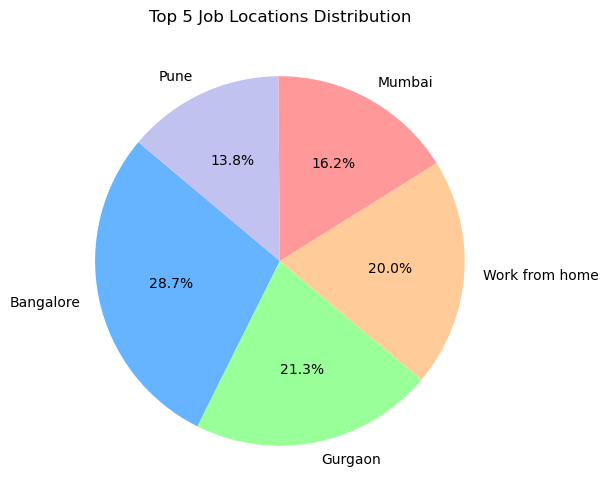

In [34]:
#Location distribution over pie chart
plt.figure(figsize=(6,6))
top_locations.plot(kind="pie", autopct='%1.1f%%', startangle=140, colors=["#66b3ff","#99ff99","#ffcc99","#ff9999","#c2c2f0"])
plt.title("Top 5 Job Locations Distribution")
plt.ylabel("")
plt.show()